# The spatial distribution of grains

In [78]:
%run -i namespace.py

## Introduction

Our callborators made samples by melting and recrystallizing the powder rod. We would like to know how the single crystal grains distribute inside the recrystalized area.

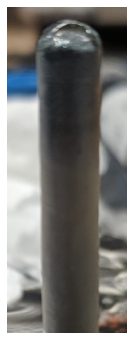

In [79]:
plt.figure(figsize=(8, 6))
plt.imshow(plt.imread("data/rod_picture.png"))
plt.axis("off")
plt.show()

We used x-ray to scan the area in a two dimensional grid and for each point on the grid, we measured the diffraction image at that point and the motor positions so that we obtained a mapping from postions to image.

At time $t$, $x(t), y(t) \rightarrow image(t)$

For each image, we subtract the background image.

$image \rightarrow processed\ image = image - background\ image$

For each processed image we found a region where there is a Bragg peak and tracked this peak across the whole set of images. We extracted the peak intensity from each image using a peak tracking algorithm.

For peak $\alpha$, we have $processed\ image \rightarrow intensity_\alpha$

we finally got a mapping from positions to peak intensity.

For peak $\alpha$, $x, y \rightarrow intensity_\alpha$

This mapping tells the information of the distribution of the grain whose Bragg peak is peak $\alpha$.

## Try with one of the grid scan data

We will get a map of peak intensity as a function of positions for one data set as an example.

### load the data

In [80]:
run = DB[UID["uid"].loc[1]]
metadata = run.metadata['start'].to_dict()
run

BlueskyRun
  uid='5959b25f-fcfc-4ec2-9187-7d8bce19711d'
  exit_status='success'
  2021-03-20 01:07:16.105 -- 2021-03-20 05:16:27.662
  Streams:
    * primary


In [30]:
data = run.primary.to_dask()
data = data.assign_attrs(metadata)
data = data.set_coords(["mXBase", "mXBase_user_setpoint", "mYBase", "mYBase_user_setpoint"])
data

<xarray.Dataset>
Dimensions:               (dim_0: 1, dim_1: 3888, dim_2: 3072, time: 4525)
Coordinates:
  * time                  (time) float64 1.616e+09 1.616e+09 ... 1.616e+09
    mXBase                (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    mXBase_user_setpoint  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    mYBase                (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    mYBase_user_setpoint  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: dim_0, dim_1, dim_2
Data variables:
    dexela_stats1_total   (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    dexela_image          (time, dim_0, dim_1, dim_2) float64 dask.array<chunksize=(1, 1, 3888, 3072), meta=np.ndarray>
Attributes: (12/22)
    time:                 1616216836.1055255
    uid:                  5959b25f-fcfc-4ec2-9187-7d8bce19711d
    versions:             {'ophyd': '1.3.3', 'bluesky': '1.6.7'}
    scan_id:              61
    proposal_id:          307690
    plan_type:            generator
    ...                   ...
    plan_pattern:         outer_product
    plan_pattern_args:    {'args': ["EpicsMotor(prefix='XF:28IDD-ES:2{Stg:Sta...
    plan_pattern_module:  bluesky.plan_patterns
    task:                 a coarse grid rocking curve
    sample:               PARAMID-2
    beam:                 slit

### Visualize the distribution of the sum of intensities

We visualize the distribution of the sum of intensities to find out where the rod is on the grid and where we can find background images.

Here, we define the beam position in the sample frame: $x_{beam} =  -x_{motor},\ y_{beam} = -y_{motor}$.

In [9]:
total_intensity = reshape(data, "dexela_stats1_total")

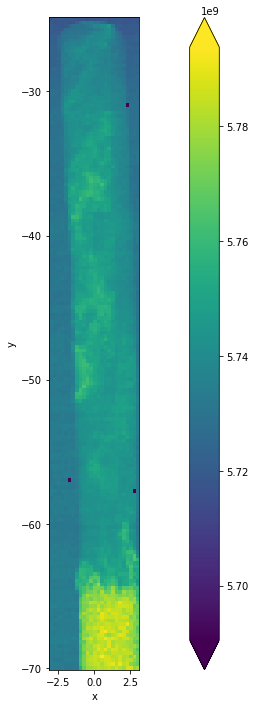

In [10]:
_ = my_color_map(total_intensity, size=12)

### Pick the background

Pick one image of pure air scattering as the background and use it to subtract other images.

In [28]:
# here the position is the motor position
condition = (data.mXBase_user_setpoint==3.) & (data.mYBase_user_setpoint==70.)
background_dexela_image = data.where(condition, drop=True)["dexela_image"].compute()
background_dexela_image

<xarray.DataArray 'dexela_image' (time: 1, dim_0: 1, dim_1: 3888, dim_2: 3072)>
array([[[[518., 439., 527., ..., 627., 611., 629.],
         [499., 483., 507., ..., 508., 576., 563.],
         [417., 497., 446., ..., 532., 498., 543.],
         ...,
         [549., 566., 528., ..., 479., 484., 445.],
         [580., 579., 564., ..., 586., 446., 541.],
         [607., 595., 634., ..., 511., 547., 500.]]]])
Coordinates:
    mXBase                (time) float64 3.0
    mXBase_user_setpoint  (time) float64 3.0
    mYBase                (time) float64 70.0
    mYBase_user_setpoint  (time) float64 70.0
    time_                 (time) float64 1.616e+09
Dimensions without coordinates: time, dim_0, dim_1, dim_2
Attributes:
    object:   dexela

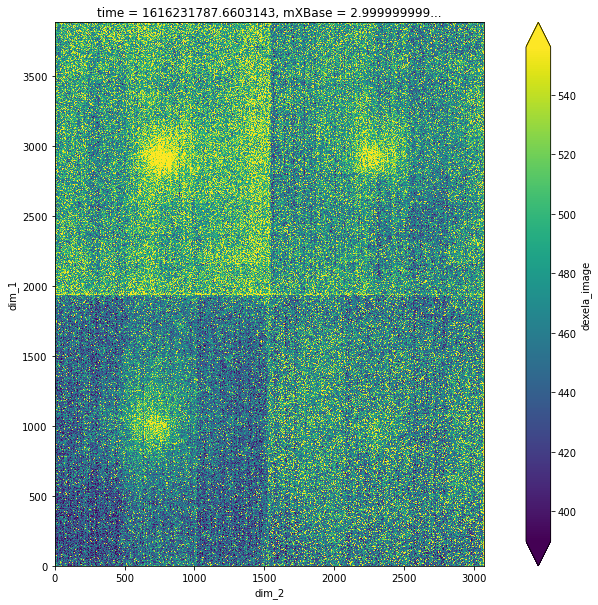

In [12]:
_ = my_color_map(background_dexela_image, size=10)

### Try the background subtraction

We select a data with Bragg peak and test the background subtraction.

In [31]:
condition = (data.mXBase_user_setpoint==0.5) & (data.mYBase_user_setpoint==50.)
test_dexela_image = data.where(condition, drop=True)["dexela_image"].compute()
test_dexela_image['time'].item()

1616225162.1928484

In [13]:
condition = (data.mXBase_user_setpoint==0.5) & (data.mYBase_user_setpoint==50.)
test_dexela_image = data.where(condition, drop=True)["dexela_image"].compute()
test_dexela_image

<xarray.DataArray 'dexela_image' (time: 1, dim_0: 1, dim_1: 3888, dim_2: 3072)>
array([[[[515., 442., 517., ..., 644., 609., 631.],
         [505., 480., 491., ..., 495., 593., 581.],
         [421., 501., 461., ..., 518., 501., 546.],
         ...,
         [565., 558., 538., ..., 483., 497., 442.],
         [570., 586., 577., ..., 590., 447., 546.],
         [633., 621., 632., ..., 520., 552., 489.]]]])
Coordinates:
  * time                  (time) float64 1.616e+09
    mXBase                (time) float64 0.5
    mXBase_user_setpoint  (time) float64 0.5
    mYBase                (time) float64 50.0
    mYBase_user_setpoint  (time) float64 50.0
Dimensions without coordinates: dim_0, dim_1, dim_2
Attributes:
    object:   dexela

This is the data we selected.

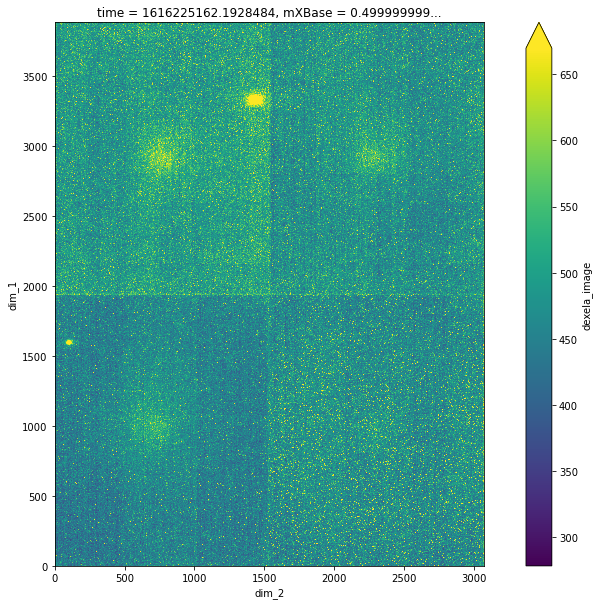

In [14]:
_ = my_color_map(test_dexela_image, size=10)

We subtract the background. The result looks fine.

In [15]:
test_result = average_subtract_fill_zero(test_dexela_image, background_dexela_image)
test_result

<xarray.DataArray 'dexela_image' (dim_1: 3888, dim_2: 3072)>
array([[ 0.,  3.,  0., ..., 17.,  0.,  2.],
       [ 6.,  0.,  0., ...,  0., 17., 18.],
       [ 4.,  4., 15., ...,  0.,  3.,  3.],
       ...,
       [16.,  0., 10., ...,  4., 13.,  0.],
       [ 0.,  7., 13., ...,  4.,  1.,  5.],
       [26., 26.,  0., ...,  9.,  5.,  0.]])
Coordinates:
    time                  float64 1.616e+09
    mXBase                float64 0.5
    mXBase_user_setpoint  float64 0.5
    mYBase                float64 50.0
    mYBase_user_setpoint  float64 50.0
Dimensions without coordinates: dim_1, dim_2

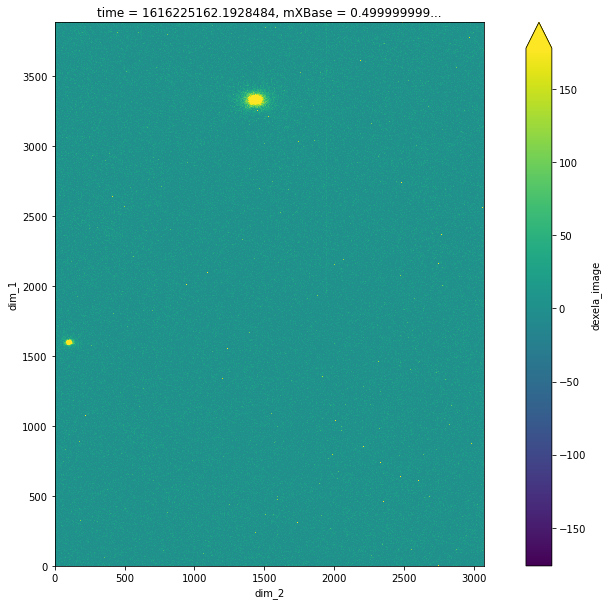

In [16]:
_ = my_color_map(test_result, size=10)

### Try the peak tracking

The algorithm finds two peaks on the image. It is reasonable.

In [17]:
df = my_locate(test_result)
df

,y,x,mass,size,ecc,signal,raw_mass,ep,time,mXBase,mXBase_user_setpoint,mYBase,mYBase_user_setpoint
0,1601.248804,104.571604,651729.646792,4.653076,0.050932,6794.123704,2095808.0,0.000237,1.616225e+09,0.5,0.5,50.0,50.0
1,3343.661755,1435.405521,329102.023514,4.315059,0.352727,4902.426516,1925632.0,0.000258,1.616225e+09,0.5,0.5,50.0,50.0


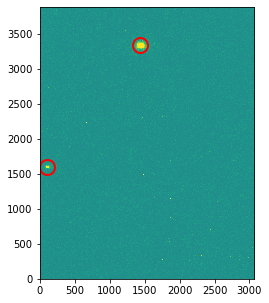

In [18]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
my_annotate_image(df, test_result, ax)